In [43]:
import pandas as pd;
import matplotlib.pyplot as plt

## 1. Dataset

In [44]:
data = pd.read_csv("./Dataset/wdbc.data",)
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
# Separate the features and the target class
features = data.iloc[:, 2:]  # The last 30 columns are features
target = data.iloc[:, 1]   # The second column is the target class

In [48]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 2. PCA for Feature Extraction

In [49]:
#Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

In [50]:
#Create a new DataFrame with the class label, PC1, and PC2
pca_df = pd.DataFrame(data={
    'Class': target,         # Use the 'Diagnosis' as the class label
    'PC1': principal_components[:, 0],  # First principal component
    'PC2': principal_components[:, 1]   # Second principal component
})

In [51]:
pca_df.head

<bound method NDFrame.head of     Class        PC1        PC2
0       M   2.416345  -3.763969
1       M   5.768399  -1.051489
2       M   7.111801  10.335227
3       M   3.961135  -1.946549
4       M   2.381271   3.975577
..    ...        ...        ...
563     M   6.490781  -3.568410
564     M   3.848622  -3.569711
565     M   1.297723  -1.889687
566     M  10.429463   1.737100
567     B  -5.461646  -0.690051

[568 rows x 3 columns]>

In [52]:
#Save the result df in a csv format
pca_df.to_csv('wdbc_2D.data', index=False)

## 3. Data Visualization with Extracted Features

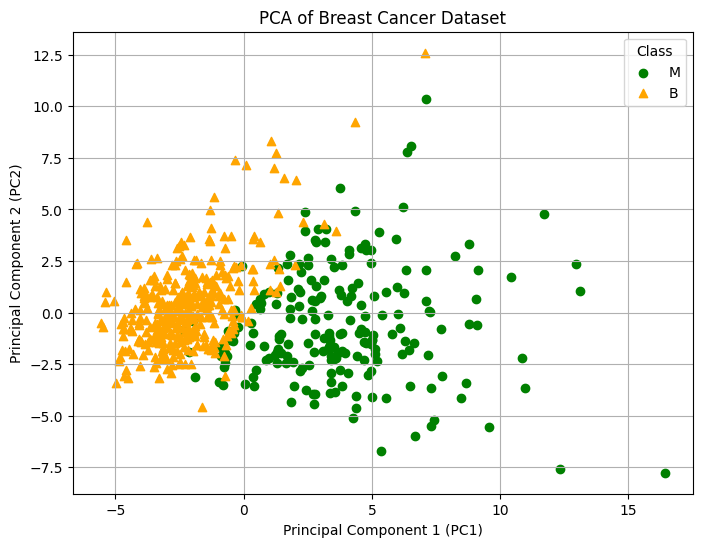

In [53]:

plt.figure(figsize=(8, 6))
# Plot malignant ('M') in green dots and benign ('B') in orange triangles
for class_value, color, marker in [('M', 'green', 'o'), ('B', 'orange', '^')]:
    subset = pca_df[pca_df['Class'] == class_value]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, marker=marker, label=class_value)

plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title="Class", loc='best')
plt.grid(True)
plt.show()


The malignant and benign data points exhibit some separation along the principal components, suggesting that these two components capture a significant amount of variance that distinguishes between the two classes. This plot effectively demonstrates the potential for distinguishing between malignant and benign cases using the top two principal components, although additional features might be needed for more accurate classification.

## 4. Quantifying Variance captured

In [54]:
#4.1 Calculate and report the percentage of total variance in the dataset that is captured by the first two principal components
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance[0] + explained_variance[1]
print(f"Variance captured by PC1 and PC2: {total_variance * 100:.2f}%")


Variance captured by PC1 and PC2: 63.20%


### 4.2 Significance of the values

The fact that 63.20% of the variance is explained by the first two principal components indicates a strong result, demonstrating that these two dimensions capture most of the variation in the dataset. This implies that the key patterns in the data are well-represented by the first two components, while the remaining 36.80% of the variance is distributed across the other 28 components. Although capturing over 60% of the variance is typically effective for many applications, it's important to recognize that around 37% of the data's finer details may be lost. Still, for most tasks, focusing on the top two components (PC1 and PC2) provides valuable insights.